###By:
1. Nicole Orleans Arviani
2. Wildan
3. Amanda Nadhifa Maydika
4. Rifdah


In [ ]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Input file csv

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/HUmanmanNER/Tugas-Akhir-Mesin/main/AbilitytoPay.csv", delimiter=';')
data.head()

,province,district,living_area,fiscal_capacity,age,sex,education,household_size,reason_join_jkn,income_household,...,outpatient_puskesmas,outpatient_clinic,outpatient_hospital,inpatient_puskesmas,inpatient_clinic,inpatient_hospital,satisfaction_puskesmas,satisfaction_familydoc,satisfaction_clinic,satisfaction_hospital
0,12,Langkat,rural,low,45,female,Graduate primary,4,Mandatory government programme; sick family me...,2000000,...,3,0,0,0,0,3,satisfied and very satisfied,missing,satisfied and very satisfied,satisfied and very satisfied
1,53,Rote Ndao,rural,low,33,male,Graduate secondary,4,Mandatory government programme; sick family me...,1000000,...,0,0,1,0,0,0,missing,missing,missing,missing
2,61,Sambas,rural,low,28,male,Graduate secondary,2,Anticipating sick family member,3000000,...,0,0,0,0,2,0,satisfied and very satisfied,missing,satisfied and very satisfied,satisfied and very satisfied
3,36,Pandeglang,urban,low,46,female,Bachelor's,5,Anticipating sick family member,3100000,...,1,0,0,0,0,0,satisfied and very satisfied,missing,missing,missing
4,072,Donggala,rural,low,40,male,Graduate junior high,3,Anticipating sick family member,2050000,...,2,0,0,0,0,0,satisfied and very satisfied,missing,missing,satisfied and very satisfied


##Data pre-processing

In [ ]:
#data reduction
col = ['fiscal_capacity','age','sex','education','household_size','income_household','household_total_expend',
       'expend_insurance_hh','expend_healthcare_hh','smoke','tobacco_expend_hh','atp_hh']
df = data[col]
df.head(10)

,fiscal_capacity,age,sex,education,household_size,income_household,household_total_expend,expend_insurance_hh,expend_healthcare_hh,smoke,tobacco_expend_hh,atp_hh
0,low,45,female,Graduate primary,4,2000000,1950000,0.0,50000,0,0,54500
1,low,33,male,Graduate secondary,4,1000000,1030000,0.0,20000,0,0,20500
2,low,28,male,Graduate secondary,2,3000000,2430000,0.0,0,0,0,75500
3,low,46,female,Bachelor's,5,3100000,1257000,NaN,NaN,smoke,180000,44550
4,low,40,male,Graduate junior high,3,2050000,2343000,0.0,0,smoke,20000,47950
5,low,35,male,Graduate junior high,4,2800000,2750000,0.0,50000,0,0,56375
6,low,50,male,Graduate junior high,4,1800000,2848000,0.0,30000,smoke,255000,54000
7,low,49,female,Graduate secondary,6,500000,710000,0.0,0,0,0,7500
8,low,60,female,Graduate junior high,6,500000,1961667,NaN,NaN,0,NaN,"25083,34961"
9,low,40,male,Graduate junior high,1,0,1823000,0.0,5000,0,0,40500


In [ ]:
df.dtypes

fiscal_capacity            object
age                         int64
sex                        object
education                  object
household_size              int64
income_household            int64
household_total_expend     object
expend_insurance_hh       float64
expend_healthcare_hh       object
smoke                      object
tobacco_expend_hh          object
atp_hh                     object
dtype: object

In [ ]:
#Mengubah Tipe data fiscal_capacity, education, sex, smoke menjadi category
col = ['fiscal_capacity','education','sex','smoke']
df[col] = df[col].astype('category')
df.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


fiscal_capacity           category
age                          int64
sex                       category
education                 category
household_size               int64
income_household             int64
household_total_expend      object
expend_insurance_hh        float64
expend_healthcare_hh        object
smoke                     category
tobacco_expend_hh           object
atp_hh                      object
dtype: object

In [ ]:
#Melihat nilai unik pada kolom education
df['education'].values

['Graduate primary', 'Graduate secondary', 'Graduate secondary', 'Bachelor's', 'Graduate junior high', ..., 'Diploma', 'Graduate secondary', 'Graduate secondary', 'Graduate secondary', 'Graduate secondary']
Length: 1709
Categories (8, object): ['Bachelor's', 'Diploma', 'Graduate junior high', 'Graduate primary',
                         'Graduate secondary', 'Incomplete primary', 'Master's', 'PhD']

In [ ]:
#Encoding atau mengubah data pada kolom fiscal_capacity, education, sex menjadi numerik
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
col = ['fiscal_capacity','education','sex']
df[col] = ord_enc.fit_transform(df[col])
df.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,fiscal_capacity,age,sex,education,household_size,income_household,household_total_expend,expend_insurance_hh,expend_healthcare_hh,smoke,tobacco_expend_hh,atp_hh
0,1.0,45,0.0,3.0,4,2000000,1950000,0.0,50000,0,0,54500
1,1.0,33,1.0,4.0,4,1000000,1030000,0.0,20000,0,0,20500
2,1.0,28,1.0,4.0,2,3000000,2430000,0.0,0,0,0,75500
3,1.0,46,0.0,0.0,5,3100000,1257000,NaN,NaN,smoke,180000,44550
4,1.0,40,1.0,2.0,3,2050000,2343000,0.0,0,smoke,20000,47950
5,1.0,35,1.0,2.0,4,2800000,2750000,0.0,50000,0,0,56375
6,1.0,50,1.0,2.0,4,1800000,2848000,0.0,30000,smoke,255000,54000
7,1.0,49,0.0,4.0,6,500000,710000,0.0,0,0,0,7500
8,1.0,60,0.0,2.0,6,500000,1961667,NaN,NaN,0,NaN,"25083,34961"
9,1.0,40,1.0,2.0,1,0,1823000,0.0,5000,0,0,40500


In [ ]:
#Mengubah data smoke dengan one hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe_result = ohe.fit_transform(df[['smoke']])
df_smoke = pd.DataFrame(ohe_result.toarray(), columns = ohe.categories_)
df_smoke.head()

,0,smoke
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [ ]:
#mengganti nama kolom pada smoke
df_smoke.columns = ['no smoke','smoke']
df_smoke.head()

,no smoke,smoke
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [ ]:
#Menghapus kolom smoke pada df awal
df = df.drop(columns='smoke')
ser_Y = df['atp_hh']
df = df.drop(columns='atp_hh')

In [ ]:
#menggabungkan tabel smoke dengan tabel df
df = df.join(df_smoke)
df = df.join(ser_Y)
df.head(40)

,fiscal_capacity,age,sex,education,household_size,income_household,household_total_expend,expend_insurance_hh,expend_healthcare_hh,tobacco_expend_hh,no smoke,smoke,atp_hh
0,1.0,45,0.0,3.0,4,2000000,1950000,0.0,50000,0,1.0,0.0,54500
1,1.0,33,1.0,4.0,4,1000000,1030000,0.0,20000,0,1.0,0.0,20500
2,1.0,28,1.0,4.0,2,3000000,2430000,0.0,0,0,1.0,0.0,75500
3,1.0,46,0.0,0.0,5,3100000,1257000,NaN,NaN,180000,0.0,1.0,44550
4,1.0,40,1.0,2.0,3,2050000,2343000,0.0,0,20000,0.0,1.0,47950
5,1.0,35,1.0,2.0,4,2800000,2750000,0.0,50000,0,1.0,0.0,56375
6,1.0,50,1.0,2.0,4,1800000,2848000,0.0,30000,255000,0.0,1.0,54000
7,1.0,49,0.0,4.0,6,500000,710000,0.0,0,0,1.0,0.0,7500
8,1.0,60,0.0,2.0,6,500000,1961667,NaN,NaN,NaN,1.0,0.0,"25083,34961"
9,1.0,40,1.0,2.0,1,0,1823000,0.0,5000,0,1.0,0.0,40500


In [ ]:
col1 = ['age','household_size','income_household','household_total_expend','expend_insurance_hh',
        'expend_healthcare_hh','tobacco_expend_hh','atp_hh']
for i in col1:
  df[i].replace(",",".",regex=True,inplace=True)

In [ ]:
col1=['household_total_expend','expend_healthcare_hh','tobacco_expend_hh','atp_hh']
df[col1] = df[col1].astype('float64')

In [ ]:
df.dtypes

fiscal_capacity           float64
age                         int64
sex                       float64
education                 float64
household_size              int64
income_household            int64
household_total_expend    float64
expend_insurance_hh       float64
expend_healthcare_hh      float64
tobacco_expend_hh         float64
no smoke                  float64
smoke                     float64
atp_hh                    float64
dtype: object

['age', 'household_size', 'income_household', 'household_total_expend', 'expend_insurance_hh', 'expend_healthcare_hh', 'tobacco_expend_hh']


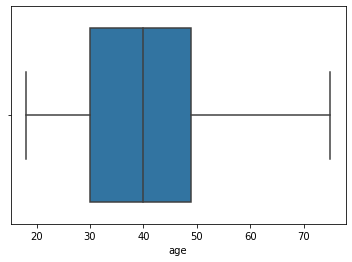

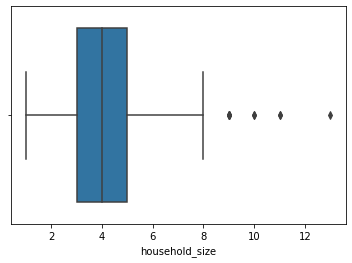

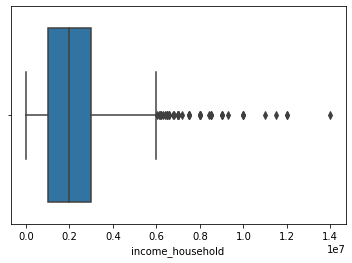

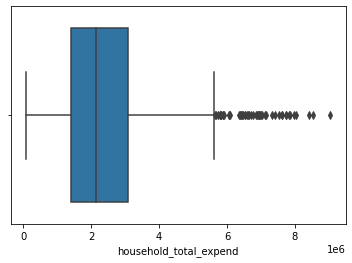

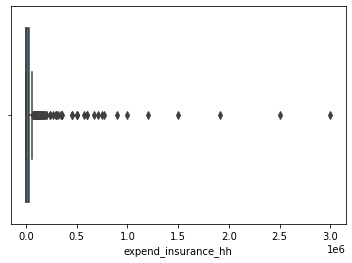

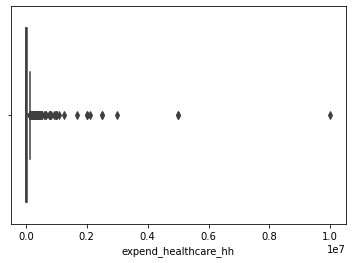

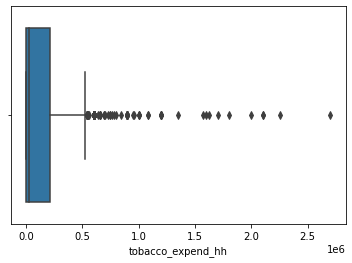

In [ ]:
#Deteksi outlier
col_num = ['age','household_size','income_household','household_total_expend','expend_insurance_hh',
           'expend_healthcare_hh','tobacco_expend_hh']
print(col_num)
for i in col_num:
  sns.boxplot(x=pd.to_numeric(df[i]))
  plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,fiscal_capacity,age,sex,education,household_size,income_household,household_total_expend,expend_insurance_hh,expend_healthcare_hh,tobacco_expend_hh,no smoke,smoke,atp_hh
0,1.0,45,0.0,3.0,4,2000000,1950000.0,0.0,50000.0,0.0,1.0,0.0,54500.00000
1,1.0,33,1.0,4.0,4,1000000,1030000.0,0.0,20000.0,0.0,1.0,0.0,20500.00000
2,1.0,28,1.0,4.0,2,3000000,2430000.0,0.0,0.0,0.0,1.0,0.0,75500.00000
3,1.0,46,0.0,0.0,5,3100000,1257000.0,NaN,NaN,180000.0,0.0,1.0,44550.00000
4,1.0,40,1.0,2.0,3,2050000,2343000.0,0.0,0.0,20000.0,0.0,1.0,47950.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,0.0,36,1.0,1.0,4,6000000,3313333.0,0.0,100000.0,0.0,1.0,0.0,56666.64844
1705,0.0,35,0.0,4.0,4,2142857,2907973.0,0.0,32500.0,0.0,1.0,0.0,88148.64844
1706,0.0,18,1.0,4.0,4,0,1200000.0,NaN,NaN,NaN,1.0,0.0,24600.00000
1707,0.0,45,0.0,4.0,2,3700000,3674000.0,0.0,0.0,0.0,1.0,0.0,73700.00000


In [ ]:
#Cek Missing Value
df.isna().sum()

fiscal_capacity             0
age                         0
sex                         0
education                   0
household_size              0
income_household            0
household_total_expend      0
expend_insurance_hh       424
expend_healthcare_hh      328
tobacco_expend_hh         295
no smoke                    0
smoke                       0
atp_hh                      0
dtype: int64

In [ ]:
#Penanganan missing value
df['expend_insurance_hh'] = df['expend_insurance_hh'].fillna(df['expend_insurance_hh'].mean())
df['expend_healthcare_hh'] = df['expend_healthcare_hh'].fillna(df['expend_healthcare_hh'].mean())
df['tobacco_expend_hh'] = df['tobacco_expend_hh'].fillna(df['tobacco_expend_hh'].mean())
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,fiscal_capacity,age,sex,education,household_size,income_household,household_total_expend,expend_insurance_hh,expend_healthcare_hh,tobacco_expend_hh,no smoke,smoke,atp_hh
0,1.0,45,0.0,3.0,4,2000000,1950000.0,0.000000,50000.000000,0.000000,1.0,0.0,54500.00000
1,1.0,33,1.0,4.0,4,1000000,1030000.0,0.000000,20000.000000,0.000000,1.0,0.0,20500.00000
2,1.0,28,1.0,4.0,2,3000000,2430000.0,0.000000,0.000000,0.000000,1.0,0.0,75500.00000
3,1.0,46,0.0,0.0,5,3100000,1257000.0,4743.028714,22028.987365,180000.000000,0.0,1.0,44550.00000
4,1.0,40,1.0,2.0,3,2050000,2343000.0,0.000000,0.000000,20000.000000,0.0,1.0,47950.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,0.0,36,1.0,1.0,4,6000000,3313333.0,0.000000,100000.000000,0.000000,1.0,0.0,56666.64844
1705,0.0,35,0.0,4.0,4,2142857,2907973.0,0.000000,32500.000000,0.000000,1.0,0.0,88148.64844
1706,0.0,18,1.0,4.0,4,0,1200000.0,4743.028714,22028.987365,88054.946595,1.0,0.0,24600.00000
1707,0.0,45,0.0,4.0,2,3700000,3674000.0,0.000000,0.000000,0.000000,1.0,0.0,73700.00000


In [ ]:
#Normalisasi
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1708
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fiscal_capacity         1225 non-null   float64
 1   age                     1225 non-null   int64  
 2   sex                     1225 non-null   float64
 3   education               1225 non-null   float64
 4   household_size          1225 non-null   int64  
 5   income_household        1225 non-null   int64  
 6   household_total_expend  1225 non-null   float64
 7   expend_insurance_hh     1225 non-null   float64
 8   expend_healthcare_hh    1225 non-null   float64
 9   tobacco_expend_hh       1225 non-null   float64
 10  no smoke                1225 non-null   float64
 11  smoke                   1225 non-null   float64
 12  atp_hh                  1225 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 134.0 KB
None


In [ ]:
from sklearn import preprocessing
array = df.values
# memisahkan array menjadi komponen input dan output
X = array[:,0:12]
Y = array[:,10]
scaler = preprocessing.StandardScaler()
scaled_df= scaler.fit_transform(X)
print(scaled_df)

[[ 0.01753969  0.37120424 -0.92371676 ... -0.73924937  0.74867186
  -0.74867186]
 [ 0.01753969 -0.54128778  1.08258294 ... -0.73924937  0.74867186
  -0.74867186]
 [ 0.01753969 -0.92149279  1.08258294 ... -0.73924937  0.74867186
  -0.74867186]
 ...
 [-1.17613397 -1.6819028   1.08258294 ...  0.          0.74867186
  -0.74867186]
 [-1.17613397  0.37120424 -0.92371676 ... -0.73924937  0.74867186
  -0.74867186]
 [-1.17613397  0.21912223 -0.92371676 ...  0.          0.74867186
  -0.74867186]]


##Split Data Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

#Membagi data menjadi data test dan data train
feature = ['fiscal_capacity','age','sex','age','education','income_household','household_total_expend','expend_insurance_hh','expend_healthcare_hh','tobacco_expend_hh','no smoke','smoke']
X = df[feature]
y = df.atp_hh
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

In [ ]:
X_train

,fiscal_capacity,age,sex,age,education,income_household,household_total_expend,expend_insurance_hh,expend_healthcare_hh,tobacco_expend_hh,no smoke,smoke
805,2.0,46,0.0,46,2.0,600000,656000.0,4743.028714,30000.000000,20000.000000,0.0,1.0
124,1.0,65,1.0,65,3.0,750000,800000.0,0.000000,20000.000000,100000.000000,0.0,1.0
802,2.0,50,1.0,50,4.0,2350000,2200000.0,0.000000,0.000000,0.000000,1.0,0.0
1662,0.0,62,1.0,62,3.0,2500000,2400000.0,0.000000,25000.000000,390000.000000,0.0,1.0
623,2.0,48,0.0,48,1.0,1000000,1856250.0,4743.028714,50000.000000,88054.946595,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,2.0,45,0.0,45,4.0,3020000,3996833.0,0.000000,40000.000000,0.000000,1.0,0.0
1277,0.0,55,0.0,55,3.0,2500000,1377167.0,4743.028714,22028.987365,88054.946595,1.0,0.0
1529,0.0,45,0.0,45,4.0,2500000,3213250.0,0.000000,0.000000,0.000000,1.0,0.0
301,1.0,36,0.0,36,4.0,0,1200000.0,4743.028714,22028.987365,88054.946595,1.0,0.0


In [ ]:
y_train

805      16600.00000
124      28000.00000
802      49100.00000
1662     49200.00000
623      52812.50000
            ...     
1015     69841.64844
1277     14458.34961
1529    112862.50000
301      24600.00000
1482     53500.00000
Name: atp_hh, Length: 980, dtype: float64

In [ ]:
X_test

,fiscal_capacity,age,sex,age,education,income_household,household_total_expend,expend_insurance_hh,expend_healthcare_hh,tobacco_expend_hh,no smoke,smoke
970,2.0,41,0.0,41,4.0,3200000,4719500.000,0.000000,2000.000000,0.000000,1.0,0.0
1601,0.0,56,1.0,56,4.0,1800000,1770000.000,4743.028714,22028.987365,88054.946595,1.0,0.0
208,1.0,31,1.0,31,2.0,2000000,2600000.000,0.000000,50000.000000,250000.000000,0.0,1.0
1289,0.0,61,1.0,61,4.0,700000,517667.000,4743.028714,22028.987365,88054.946595,1.0,0.0
444,1.0,23,1.0,23,0.0,4000000,2015000.000,4743.028714,10000.000000,88054.946595,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.0,55,0.0,55,3.0,1600000,2341708.000,0.000000,0.000000,210000.000000,0.0,1.0
402,1.0,30,1.0,30,4.0,0,780000.000,4743.028714,10000.000000,88054.946595,1.0,0.0
78,1.0,34,0.0,34,2.0,3000000,2501666.667,4743.028714,50000.000000,88054.946595,1.0,0.0
1193,0.0,46,0.0,46,4.0,1000000,1695000.000,0.000000,0.000000,0.000000,1.0,0.0


In [ ]:
y_test

970     154375.00000
1601     36285.00000
208      59000.00000
1289     17083.34961
444      11750.00000
            ...     
1553     64685.39844
402       7000.00000
78       53083.33203
1193     21750.00000
824      54750.00000
Name: atp_hh, Length: 245, dtype: float64

##MLP (Multi Layer Perceptron): Backpropagation

In [ ]:
from sklearn.neural_network import MLPRegressor
#Implementasi MLP pada kasus regresi (pembuatan model)
regr = MLPRegressor(random_state = 1, max_iter = 500).fit(X_train, y_train)

In [ ]:
#Prediksi data test
regr.predict(X_test[:2])
pred = regr.score(X_test, y_test)
pred

0.6639358287548016

In [ ]:
#Nilai regresi pada data test
test = regr.score(X_train, y_train)
test

0.6904577315398728

In [ ]:
#Nilai akurasi
accuracy = 1 - abs(test-pred)
print("Accuracy from the model:",accuracy*100)

Accuracy from the model: 97.34780972149288


In [ ]:
#RMSE
import math
MSE = np.square(np.subtract(pred,test)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:", RMSE*100)

Root Mean Square Error: 2.652190278507116


Interpretasi:
Model regresi dari Multilayer Perceptron dapat digunakan untuk prediksi dengan tingkat akurasi sebesar 97% dan RMSE sebesar 3%. Dengan tingkat akurasi yang tinggi dan RMSE rendah, model MLP merupakan model yang baik untuk memprediksi kemampuan nasabah untuk membayar per rumah tangga atau atp_hh.

##RBF (Radial Basis Function)

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model

In [ ]:
#Mendefinisikan x dan y
data = pd.read_csv('https://raw.githubusercontent.com/mlanaAlana/UasAnalitikaData/main/Clean_data2.csv')

scaler = StandardScaler()
data = scaler.fit_transform(data)

X = data[:,:-1]
y = data[:,-1]

# memisahkan data set menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(660, 13) (283, 13) (660,) (283,)


In [ ]:
import random
import keras
from keras import layers
import tensorflow as tf
from keras import backend as K
from keras.layers import Layer
from keras import backend as K
from keras.initializers import RandomUniform, Initializer, Orthogonal, Constant
import numpy as np


class InitCentersRandom(Initializer):
    """ Initializer for initialization of centers of RBF network
        as random samples from the given data set.
    # Arguments
        X: matrix, dataset to choose the centers from (random rows
          are taken as centers)
    """

    def __init__(self, X):
        self.X = X

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]
        idx = np.random.randint(self.X.shape[0], size=shape[0])
	# type checking to access elements of data correctly
        if type(self.X) == np.ndarray:
          return self.X[idx,:]
        elif type(self.X) == pd.core.frame.DataFrame:
          return self.X.iloc[idx,:]


class RBFLayer(Layer):
    """ Layer of Gaussian RBF units.
    # Example
    ```python
        model = Sequential()
        model.add(RBFLayer(10,
                           initializer=InitCentersRandom(X),
                           betas=1.0,
                           input_shape=(1,)))
        model.add(Dense(1))
    ```
    # Arguments
        output_dim: number of hidden units (i.e. number of outputs of the
                    layer)
        initializer: instance of initiliazer to initialize centers
        betas: float, initial value for betas
    """

    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):
        self.output_dim = output_dim
        self.init_betas = betas
        if not initializer:
            self.initializer = RandomUniform(0.0, 1.0)
        else:
            self.initializer = initializer
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):

        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=Constant(
                                         value=self.init_betas),
                                     # initializer='ones',
                                     trainable=True)

        super(RBFLayer, self).build(input_shape)

    def call(self, x):

        C = K.expand_dims(self.centers)
        H = K.transpose(C-K.transpose(x))
        return K.exp(-self.betas * K.sum(H**2, axis=1))

        # C = self.centers[np.newaxis, :, :]
        # X = x[:, np.newaxis, :]

        # diffnorm = K.sum((C-X)**2, axis=-1)
        # ret = K.exp( - self.betas * diffnorm)
        # return ret

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

    def get_config(self):
        # have to define get_config to be able to use model_from_json
        config = {
            'output_dim': self.output_dim
        }
        base_config = super(RBFLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
from keras.initializers import Initializer
from sklearn.cluster import KMeans


class InitCentersKMeans(Initializer):
    """ Initializer for initialization of centers of RBF network
        by clustering the given data set.
    # Arguments
        X: matrix, dataset
    """

    def __init__(self, X, max_iter=100):
        self.X = X
        self.max_iter = max_iter

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]

        n_centers = shape[0]
        km = KMeans(n_clusters=n_centers, max_iter=self.max_iter, verbose=0)
        km.fit(self.X)
        return km.cluster_centers_

In [ ]:
from tensorflow.keras.optimizers import RMSprop
histories = []
if __name__ == "__main__":

    model = Sequential()
    rbflayer = RBFLayer(10, initializer=InitCentersKMeans(X),betas=2.0,input_shape=(13,))
    model.add(rbflayer)
    model.add(Dense(1))

    model.compile(loss='mean_squared_error',
                  optimizer=RMSprop())

    history = model.fit(X_train, y_train,
              batch_size=5,
              epochs=270,
              validation_data=(X_test, y_test))

    ypred = model.predict(X)
    #print(ypred)
    #print(rbflayer.get_weights())
    histories.append(history)

Epoch 1/270
132/132 [==============================] - 1s 3ms/step - loss: 1.0086 - val_loss: 0.9824
Epoch 2/270
132/132 [==============================] - 0s 2ms/step - loss: 1.0078 - val_loss: 0.9831
Epoch 3/270
132/132 [==============================] - 0s 3ms/step - loss: 1.0078 - val_loss: 0.9836
Epoch 4/270
132/132 [==============================] - 0s 3ms/step - loss: 1.0077 - val_loss: 0.9839
Epoch 5/270
132/132 [==============================] - 0s 2ms/step - loss: 1.0078 - val_loss: 0.9845
Epoch 6/270
132/132 [==============================] - 0s 2ms/step - loss: 1.0075 - val_loss: 0.9844
Epoch 7/270
132/132 [==============================] - 0s 3ms/step - loss: 1.0073 - val_loss: 0.9843
Epoch 8/270
132/132 [==============================] - 0s 2ms/step - loss: 1.0070 - val_loss: 0.9847
Epoch 9/270
132/132 [==============================] - 0s 2ms/step - loss: 1.0066 - val_loss: 0.9849
Epoch 10/270
132/132 [==============================] - 0s 2ms/step - loss: 1.0066 - val_lo

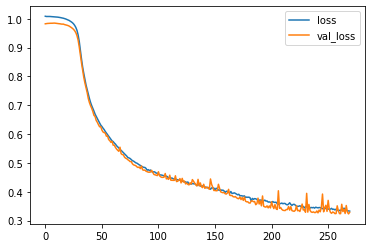

In [ ]:
#tampilkan plot loss dan Val loss
res = pd.DataFrame(histories[0].history)
res.plot()

In [ ]:
mae = metrics.mean_absolute_error(y, ypred)
mse = metrics.mean_squared_error(y, ypred)
rmse = math.sqrt(mse)
r2 = metrics.r2_score(y, ypred)
acc = 1 - mse
print("MAE = ", mae)
print("MSE = ", mse)
print("RMSE = ", rmse)
print("R2 = ",r2)
print("Accuracy =",acc)

MAE =  0.3628269954271479
MSE =  0.32740421545423787
RMSE =  0.5721924636468378
R2 =  0.6725957845457621
Accuracy = 0.6725957845457622


Interpretasi:
Model regresi dari Radial Basis Function dapat digunakan untuk prediksi kemampuan customer dalam membayar per rumah tangga dengan tingkat akurasi sebesar 67% dan RMSE sebesar 57%.

In [ ]:
nama_file_ipynb = 'Tugas_Neural_Networks-1.ipynb'

In [ ]:
!apt update
!apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

from google.colab import drive
drive.mount('/content/gdrive')

import re, pathlib, shutil

nama_file_ipynb = nama_file_ipynb + '.ipynb' if '.ipynb' not in nama_file_ipynb else nama_file_ipynb

print(f"\nProcessing {nama_file_ipynb}\n")
fullpath = r"/content/gdrive/My Drive/Colab Notebooks/Tugas_Neural_Networks-1.ipynb"

#Optionally copy your notebooks from gdrive to your vm
#shutil.copy(fullpath, nama_file_ipynb)
n = pathlib.Path(fullpath)

!jupyter nbconvert "{n.as_posix()}" --to pdf --output "{n.stem.replace(" ", "_")}"

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 